## Foundations: Clean Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

![Clean Data](../../img/clean_data.png)

### Read in Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('../../../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables

#### Fill missing for `Age`

In [377]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there 177 missing values in Age column, replace the empty values with the mean of the Age.

In [378]:
#use .fillna() to input the missing values with the mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Combine `SibSp` & `Parch`

<Figure size 432x288 with 0 Axes>

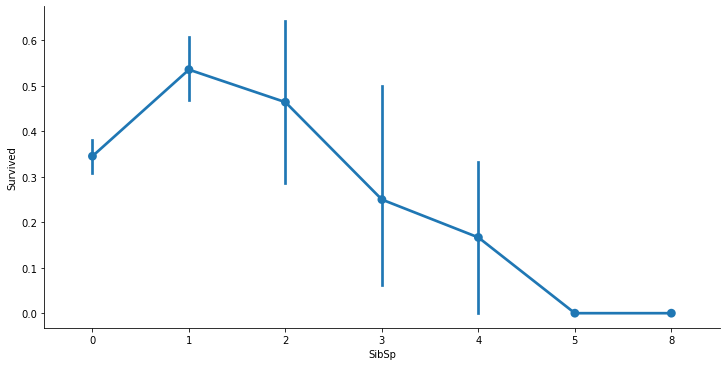

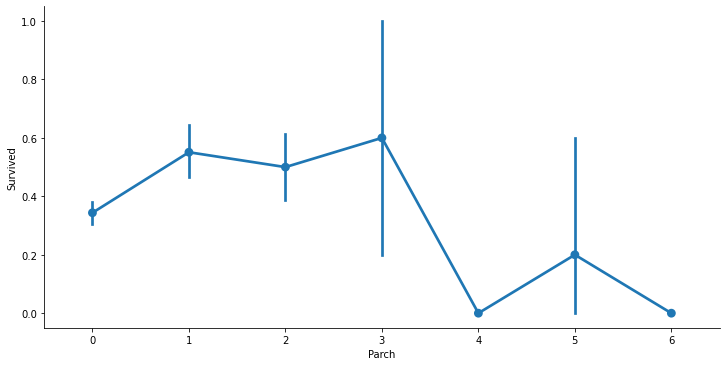

In [379]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
plt.show()

The sibsp and parch have similar trend. In both cases, the more spouse or children a passenager has, the less likely they are to survive. Hence I will combine both columns as one and name it Family_cnt

In [380]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [381]:
#Since the sibsp and parch has been combined, I need to drop them and also the passangerid as it won't help the prediction in anyway 
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [382]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [383]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

Need to check survive rate based on cabin feature as I can't input the mean like I did in the Age cloumn

In [384]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean() # taking the average of the survived in this case is pretty much 
#the survival rate for each group-missing or non-missing cabin feature

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

From the result, the survival rate(<30%) was very low when the cabin feature is missing. This means that the passangers with no cabins actually do not have a cabin and hence were unlikely to survive.

In [385]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1) # Here I am creating a cabin indicator for each passanger. 1 means is not missing. 0 means is missing.
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1,0


#### Convert `Sex` to numeric

since ml model doesn't know what a male or female is, I will convert the male and female in to numbers. 0 being male, female being 1

In [386]:
gender_num = {'male': 0, 'female': 1} #this is a dictionary
titanic['Sex'] = titanic['Sex'].map(gender_num)  #this will control the gender mapping
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Drop unnecessary variables

I will drop Cabin because I already have cabin_ind instead. I am dropping Embarked because it wasn't the really factor for surviving even there are correlation, sex and cabin indicator is more likely the causal factor for survival. Name and Ticket wasn't a causal factor either. So I am dropping them as well

In [387]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head(5)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


Now that the data is cleaned, it is time to save it and use it for further analysis and ml building.

### Write out cleaned data

### Import the clean dataset

In [31]:
titanic_clean = pd.read_csv('../../../titanic_cleaned.csv')
titanic_clean.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Split into train, validation, and test set

![Split Data](../../img/split_data.png)

#### Train/Split

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split # import the sklearn train/split library

In [33]:
features = titanic_clean.drop('Survived', axis=1) # droping Survived the field or column because it is one I want to predict.
labels = titanic_clean['Survived'] 
#Train and split the clean data
#chossing test_size as 40% because I want to use 20% for validation
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size =0.4, random_state = 42)

#Set up the validation data with x_test as the features and y_test as the labels. 
#0.5 test_size means half of the test_size which is 20
#change the X_train to X_val, and y_train to y_val
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size =0.5, random_state = 42)

##### Check to make sure that 60% was store for training and 20% for testing

In [34]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2)) # this will represent the full clean dataset, round to 2 decimal place

0.6
0.2
0.2


###### y_train has 60% of the data
###### y_val has 20%
###### y_test has 20%

### Write out all data, save to file as csv

X_train.to_csv('../../../train_features.csv', index=False)
X_val.to_csv('../../../val_features.csv', index=False)
X_test.to_csv('../../../test_features.csv', index=False)

y_train.to_csv('../../../train_labels.csv', index=False)
y_val.to_csv('../../../val_labels.csv', index=False)
y_test.to_csv('../../../test_labels.csv', index=False)

### Build ML models

## Logistic Regression: Hyperparameters

Import [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `sklearn` and explore the hyperparameters.

###### Logistic Regression: Binary target variable
###### It is more transparent 
###### Fairly well-behaved data
###### Need a quick initial benchmark


###### DO NOT USE  when the target variable is continuous
###### DO NOT USE  when you have massive data
###### DO NOT USE  with unwieldly data
###### DO NOT USE  with data with alot of outliers, missing features, rarely the best. 

#### The C hyperparameter is a regularization parameter in logistic regression that controls 
#### how closely the model fits to the traning data

###### c = /lambda. Hence as lambda gets to zero, c goes to infinity which means high chances of overfiting
###### because of low regularization, high complexity
###### High lambda means small c which means high chances of underfitting becasue of high regularization and low complexity.

#### Regularization is a technique used to reduce overfitting by discouraging overly complex models in some way.

## Logistic Regression: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Logistic Regression model.

### Read in Data

![CV](../../img/CV.png)
![Cross-Val](../../img/Cross-Val.png)

In [35]:
import joblib #use to pickle the best model and save it out to be able to read it back in
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('../../../train_features.csv')
tr_labels = pd.read_csv('../../../train_labels.csv')# header=None)

In [393]:
tr_labels

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


In [394]:
dir(LogisticRegression) # see all the methods included with logisticregression object

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

### Hyperparameter tuning

![C](../../img/c.png)

In [36]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [396]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #the hyperparameter settings for evaluating the model
}

cv = GridSearchCV(lr, parameters, cv = 5) # i am doing 5 fold cross validation
cv.fit(tr_features, tr_labels.values.ravel()) # to change the labels to array from column vector
print_results(cv)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [397]:
cv.best_estimator_ # this is an actual model. the logisticregression model performed best at C=1

LogisticRegression(C=1)

### Write out pickled model, save the model

# Model 2: Support Vector Machine

## Support Vector Machines: Hyperparameters

Import [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from `sklearn` and explore the hyperparameters.

##### A support Vector Machine. SVM is a classifier that finds an optimal hyperplane that maximize the margin
###### between two classes.

###### finding a line(in 2D but called a hyperplane in nD space) that is evenly spaced between group points


###### The kernel trick: A.K.A kernel method, transforms data that is not linearly separable in n-dimensional space
###### to a higher dimension where it is linearly separable.


## Guidelines for using SVM:

###### Use for Binary target varable
###### Feature-to-row ratio is very high
###### very complex relations
###### best for data with lots of outliers


## DO NOT USE when:
###### Feature-to-row ratio is very low
###### Transparency is importance or interested in significance of predictors
###### looking for a quick benchmark model



### Import the SVM algorithm

In [398]:
from sklearn.svm import SVC

##### The C hyperparameter is a penalty term determines how closely the model fits to the training set

### Hyperparameter tuning

![c_svm](../../img/c_svm.png)

In [399]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svm = GridSearchCV(svc, parameters, cv = 5)
cv_svm.fit(tr_features, tr_labels.values.ravel())
print_results(cv_svm)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [400]:
cv_svm.best_estimator_ # this the SVM model

SVC(C=0.1, kernel='linear')

###### Save the SVM model using joblib

joblib.dump(cv_svm.best_estimator_, '../../../SVM_model.pkl')

## Multilayer Perceptron: Hyperparameters

Import [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) and [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) from `sklearn` and explore the hyperparameters.

##### A multilayer perceptron is a classic feed-forward artificial neural network, the core component of deep learning
##### Or it is a connected series of nodes(in the form of a directed acyclic graph), where each node represents a function or a model.


## Use Multilayer Perceptron when:
##### Categorical or continuous target variable
##### Very complex relationships or performance is the only thing that matters
##### Control over the training process is very important

## DO NOT USE when:

##### Image recognitions, time series, etc. use CNN instead
##### Transparency is important or insterested in significance of predictors. because it is like blackbox. don't really know what's going on instead the blackbox.

##### Need a quick benchmark model. requires lots of time to train
##### Limited data available. better off with SVM or logistic regression

### Import Multilayer Perceptron Algorithm for Classification & Regression

In [401]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

## Multilayer Perceptron: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Multilayer Perceptron model.

##### hidden layer-size hyperparameter determines how many hidden layers there will be and how many nodes in each layer.

##### Activation Function- hyperparameter dictates the type of nonlinearity that is introduced to the model.

##### The Learning rate- hyperparameter facilitates both how quickly and whether or not the algorithm will find the optimal solution. small learning rate takes long but it will find optimal solution eventually.

### Hyperparameter tuning

![hidden layer](../../img/hidden_layers.png)

In [402]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], #using 1 hidden layer
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
cv_mlp = GridSearchCV(mlp, parameters, cv = 5)
cv_mlp.fit(tr_features, tr_labels.values.ravel())
print_results(cv_mlp)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.721 (+/-0.078) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.732 (+/-0.159) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.713 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.802 (+/-0.104) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.792 (+/-0.128) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.794 (+/-0.087) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.785 (+/-0.075) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.803 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.785 (+/-0.152) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learni

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [403]:
cv_mlp.best_estimator_ # this is the mlp model

MLPClassifier(activation='tanh')

## Save the MLP model

joblib.dump(cv_mlp.best_estimator_, '../../../MLP_model.pkl')

## Random Forest: Hyperparameters

Import [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from `sklearn` and explore the hyperparameters.

### Import Random Forest Algorithm for Classification & Regression

#### USE when:

###### Categorical or continuous target variable
###### Interested in significance of predictors
###### Need a quick benchmark model
###### If you have messy data, such as missing values, outliers

#### DO NOT USE SUGGESTION-when:

###### If you're solving a very complex, novel problem(might not be the right tools)
###### Transparency is important
###### Prediction time is important
###### 


In [404]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

##### The n_estimators hyperparameter controls how many individual decision trees will be built.-->width
##### The max_depth hyperparameter controls how deep each individual tree can go.-->depth

### Hyperparameter tuning

![RF](../../img/rf.png)

## Random Forest: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Random Forest model.

In [405]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250], # number of trees to build
    'max_depth': [2, 4, 8, 16, 32, None] # how deep the tree can go
}

cv_rf = GridSearchCV(rf, parameters, cv = 5)
cv_rf.fit(tr_features, tr_labels.values.ravel())
print_results(cv_rf)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.785 (+/-0.12) for {'max_depth': 2, 'n_estimators': 5}
0.798 (+/-0.102) for {'max_depth': 2, 'n_estimators': 50}
0.798 (+/-0.134) for {'max_depth': 2, 'n_estimators': 250}
0.8 (+/-0.093) for {'max_depth': 4, 'n_estimators': 5}
0.818 (+/-0.12) for {'max_depth': 4, 'n_estimators': 50}
0.828 (+/-0.118) for {'max_depth': 4, 'n_estimators': 250}
0.824 (+/-0.058) for {'max_depth': 8, 'n_estimators': 5}
0.826 (+/-0.077) for {'max_depth': 8, 'n_estimators': 50}
0.809 (+/-0.083) for {'max_depth': 8, 'n_estimators': 250}
0.8 (+/-0.049) for {'max_depth': 16, 'n_estimators': 5}
0.815 (+/-0.034) for {'max_depth': 16, 'n_estimators': 50}
0.813 (+/-0.04) for {'max_depth': 16, 'n_estimators': 250}
0.811 (+/-0.042) for {'max_depth': 32, 'n_estimators': 5}
0.813 (+/-0.036) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.028) for {'max_depth': 32, 'n_estimators': 250}
0.781 (+/-0.043) for {'max_depth': None, 'n_estimators': 5}
0.811 (+/-0.024) fo

#### The random forest model has 82.6% prediction accuracy

In [406]:
cv_rf.best_estimator_ # this is the random forest model

RandomForestClassifier(max_depth=4, n_estimators=250)

### Write out pickled model, save the model

## Boosting: Hyperparameters

Import [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) from `sklearn` and explore the hyperparameters.

#### Boosting is an emsemble method that aggregates a number of weak models create one strong model


###### A weak model is one that is only slightly better than random guessing. A strong model is one that is strongly correlated with true classification


#### Boosting effectively learns from its mistakes with each iteration.


### Difference between Random Forest and Boosting
##### Each decision tree or model in Random Forest was built independently
##### Whereby in Boosting, each model learns from the mistake of previous model before it so there aren't independent



### When to USE:
#### Categorical or continuous target variable
#### Useful on nearly any type of problem
#### Interested in Significance of predictors
#### Prediction time is important

### DO NOT USE when:
##### Transparency is important
##### Training time is important or compute power is limited
##### Data is really noisy (has a tendancy to overfit since it constantly learning from previous models mistake)


### Hyperparameter tuning

![GB](../../img/gb.png)

### Import Boosting Algorithm for Classification & Regression

In [49]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [50]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9], # more decision trees because they all weak
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb = GridSearchCV(gb, parameters, cv = 5)
cv_gb.fit(tr_features, tr_labels.values.ravel())
print_results(cv_gb)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.83 (+/-0.049) for {'learning_ra

##### the gb model has 84.1% prediction accuracy with learning rate of 0.01, max depth of 3 and n_estimators of 500

In [409]:
cv_gb.best_estimator_ # This is the Gradient Boosting model

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

## Save the model

# XGBoosting: Hyperparameters

#### eXtreme Gradient Boosted trees
#### Remember boosting is an ensemble method\
#### Parallell processing
#### Can cross-validate at each iteration
##### Enables early stopping, finding optimal number of iteration
#### Incremental training
#### Can plug in your own optimization objectives
#### Tree pruning
##### Generally results in deeper, but optimized trees.


## The Hyperparameters
##### 1. Booster
######   gbtree or gblinear
##### 2. Objective(ie, multi:softmax, multi:softprob). softmax for best classification
##### 3. Eta(learning rate-adjusts weights on each step). in reality 0.2 may give better result
##### 4. Max_depth(depth of the tree) if small the model may underfit, if too big the model may overfit
##### 5. Min_child_weight--> used to control the model from overfitting. if too high the model may underfit


In [25]:
import xgboost as xgb

In [26]:
xgb_model = xgb.XGBClassifier()
param = {
         'objective':['binary:logistic'], # binary since it is classific problem
         'n_estimators': [5, 50, 250],
         'eta': [0.05, 0.1, 0.2, 0.3], #so called `eta` value
         'max_depth': [2, 4, 6, 8],
         'random_state': [42],
         'disable_default_eval_metric': ['True']
         
        }

##### I will be using the randomizedSearchCV instead because the GridSearchCV when used with xgboost has no .best_estimator_ attribute

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_search_xgb = RandomizedSearchCV(xgb_model, param, cv = 5)
random_search_xgb.fit(tr_features, tr_labels.values.ravel())
print_results(random_search_xgb)

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:122

BEST PARAMS: {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 2, 'eta': 0.2, 'disable_default_eval_metric': 'True'}

0.832 (+/-0.076) for {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 4, 'eta': 0.05, 'disable_default_eval_metric': 'True'}
0.83 (+/-0.035) for {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 250, 'max_depth': 4, 'eta': 0.05, 'disable_default_eval_metric': 'True'}
0.822 (+/-0.066) for {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 8, 'eta': 0.2, 'disable_default_eval_metric': 'True'}
0.841 (+/-0.091) for {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 2, 'eta': 0.2, 'disable_default_eval_metric': 'True'}
0.809 (+/-0.061) for {'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 250, 'max_depth': 8, 'eta': 0.1, 'disable_default_eval_metric': 'True'}
0.833 (+/-0.041) for {'random_state': 

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### the Xgboost model prediction accuracy of 84.3% with n_estimator of 250, and eta(a.k.a learning rate) of 0.1

In [51]:
random_search_xgb.best_estimator_ # this is the xgboost model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric='True', enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Save the xgboost model

## Summary

### Accuracy
##### How does the model handle data of different sizes, such as short and fat, long and skinny data?. if alot of features, few rows use SVM
##### How does the model handle the complexity of feature relationship? if too complex maybe consider MLP, Gradient Boosting
##### How does the model handle messy data? if alot of outliers SVM is probable a good choice. GB is not because it might overfit to the outliers

### Latency
##### How long will the model take to train. for limit time, use logistic regression
##### How long will it take to predict. consider gradient boosting

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
val_features = pd.read_csv('../../../val_features.csv')
val_labels = pd.read_csv('../../../val_labels.csv') #, header=None)

te_features = pd.read_csv('../../../test_features.csv')
te_labels = pd.read_csv('../../../test_labels.csv') #, header=None)

In [81]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF']: #, 'GB', 'XGBoost']: # load all the model using for loop
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

### Evaluate models on the validation set

![Evaluation Metrics](../../img/eval_metrics.png)

In [83]:

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [84]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 11.8ms
SVM -- Accuracy: 0.747 / Precision: 0.672 / Recall: 0.6 / Latency: 5.9ms
MLP -- Accuracy: 0.775 / Precision: 0.712 / Recall: 0.646 / Latency: 3.5ms
RF -- Accuracy: 0.809 / Precision: 0.792 / Recall: 0.646 / Latency: 8.6ms


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Evaluate best model on test set

In [85]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.804 / Precision: 0.836 / Recall: 0.671 / Latency: 6.6ms


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
